**Calibration** <br>
The program takes data from the calibration of a polarizing filter on the laser which changes intesity

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

cali = pd.read_csv('C:\\Users\chris\OneDrive\Desktop\SRSP\Data\\calibration.csv', header = None)

In [16]:
theta = cali[0]
power = []
#data includes total laser power mesured and background power, subtract out background
for i in range(len(cali)):
    power.append(cali[1][i]-cali[2][i])

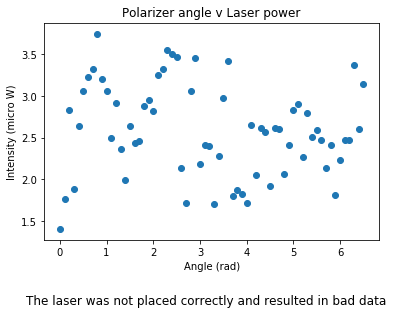

In [17]:
plt.xlabel("Angle (rad)")
plt.ylabel("Intensity (micro W)")
plt.title("Polarizer angle v Laser power")
plt.figtext(0.5, -0.1, "The laser was not placed correctly and resulted in bad data", wrap=True, horizontalalignment='center', fontsize=12)
plt.scatter(theta, power)

**Calibration** <br>
The program takes data from the calibration of a polarizing filter on the laser which changes intesity. This is a new trial, with better placemnet of the intensity sensor. 

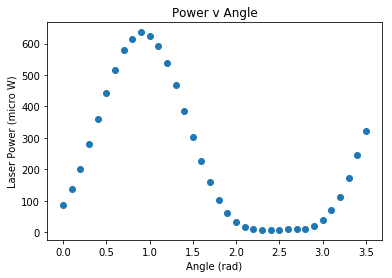

In [18]:
cali2 = pd.read_csv('C:\\Users\chris\OneDrive\Desktop\SRSP\data\\calibration2.csv', header = None)
#loads calibration of data from 0 to 2.1 radians, before it levels off
cali2cut = pd.read_csv('C:\\Users\chris\OneDrive\Desktop\SRSP\Data\\calibration2cut.csv', header = None)
#extract angle and laser intensity from both sets of data
cali2Ang = cali2[0]
cali2Power = cali2[3]
cali2AngCut = cali2cut[0]
cali2PowerCut = cali2cut[3]
#plot full set of data
plt.xlabel("Angle (rad)")
plt.ylabel("Laser Power (micro W)")
plt.title("Power v Angle")
plt.scatter(cali2Ang, cali2Power)

Function: y = 299.9033*sin(2.7903*x + 11.5792) + 328.2469


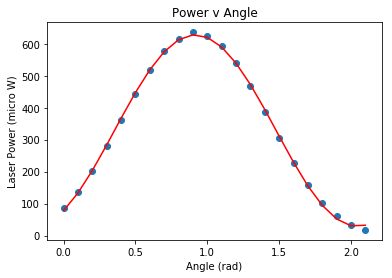

In [19]:
from pylab import *
from scipy.optimize import curve_fit

#define x and y to be fitted
xcali2 = cali2AngCut
ycali2 = cali2PowerCut
#sine function to fit to data
def func(x, a, w, o, b):
    return a * np.sin(w*x + o) + b
#store fitted function paramaters
popt, pcov = curve_fit(func, xcali2, ycali2, [350, 4, 10, 650])
#print out the function
print("Function: y = " + str(round(popt[0], 4)) + "*sin(" + str(round(popt[1], 4)) + "*x + " 
       + str(round(popt[2], 4)) + ") + " + str(round(popt[3], 4)))
#plot the data and the fitted function
scatter(xcali2, ycali2)
plot(xcali2,func(xcali2,*popt), 'r')
plt.xlabel("Angle (rad)")
plt.ylabel("Laser Power (micro W)")
plt.title("Power v Angle")
show()

Function: y = 599.8067*sin(-1.3952*x + 15.4161)^2 + 28.3435


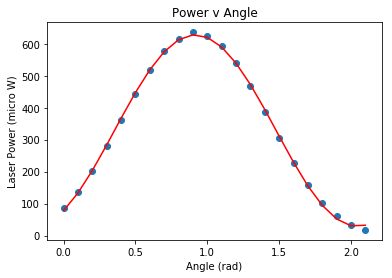

In [20]:
#sine sqaured function to fit to data
def func(x, a, w, o, b):
    return a * (np.sin(w*x + o))**2 + b
#store fitted function paramaters
popt, pcov = curve_fit(func, xcali2, ycali2, [350, 4, 10, 650])
#print out the function
print("Function: y = " + str(round(popt[0], 4)) + "*sin(" + str(round(popt[1], 4)) + "*x + " 
       + str(round(popt[2], 4)) + ")^2 + " + str(round(popt[3], 4)))
#plot the data and the fitted function
scatter(xcali2, ycali2)
plot(xcali2,func(xcali2,*popt), 'r')
plt.xlabel("Angle (rad)")
plt.ylabel("Laser Power (micro W)")
plt.title("Power v Angle")
show()